# happiness_score_Project

In [434]:
# Description

In this project we will find the happiness score of all the countries , we have 158 rows and 12 columns

In [435]:
# Importing Required libraries

In [436]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [334]:
df=pd.read_csv('happiness.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [335]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [336]:
df.shape

(158, 12)

In [337]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [338]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [340]:
# Summary Statistics

In [341]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [342]:
df1 = df.rename(columns={'Happiness Rank':'HapR' , 'Happiness Score' : 'HapS' , 'Standard Error' : 'StdE' ,'Economy (GDP per Capita)':'Economy' ,'Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust'})
df1

,Country,Region,HapR,HapS,StdE,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [343]:
df1.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [344]:
# Data visualizations

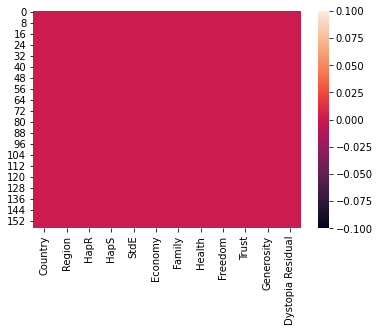

In [345]:
sns.heatmap(df1.isnull())

In [346]:
df1.isnull()

,Country,Region,HapR,HapS,StdE,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [347]:
# To check Correlation

In [348]:
df1cor=df1.corr()
df1cor

,HapR,HapS,StdE,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
HapR,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
HapS,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
StdE,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


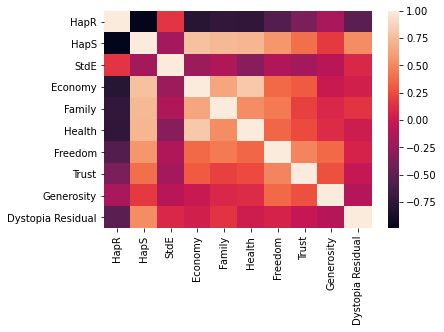

In [349]:
sns.heatmap(df1cor)

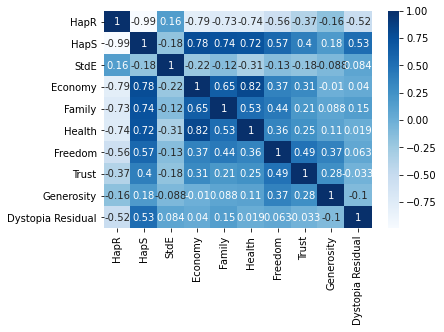

In [350]:
plt.figure(figsize=(6,4))
sns.heatmap(df1cor,cmap='Blues',annot=True)

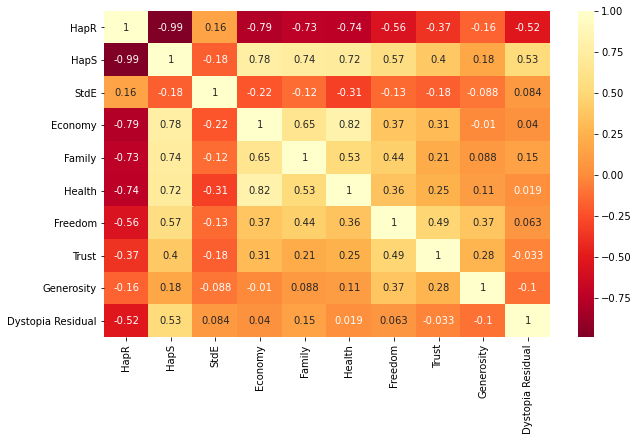

In [351]:
plt.figure(figsize=(10,6))
sns.heatmap(df1cor,cmap='YlOrRd_r',annot=True)

In [352]:
df1.head()

,Country,Region,HapR,HapS,StdE,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


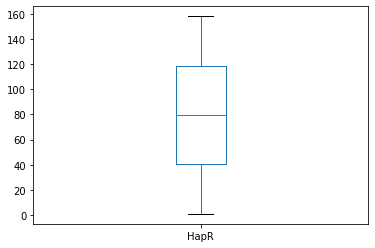

In [353]:
#univariate analysis
df1['HapR'].plot.box()

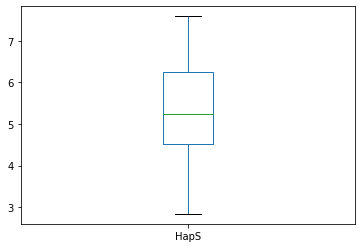

In [354]:
df1['HapS'].plot.box()

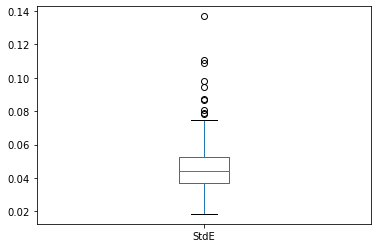

In [355]:
df1['StdE'].plot.box()

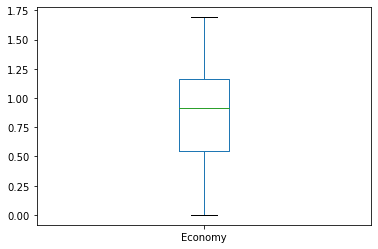

In [356]:
df1['Economy'].plot.box()

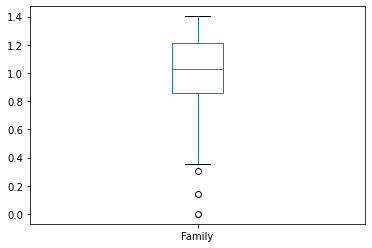

In [357]:
df1['Family'].plot.box()

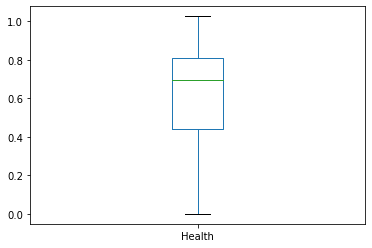

In [358]:
df1['Health'].plot.box()

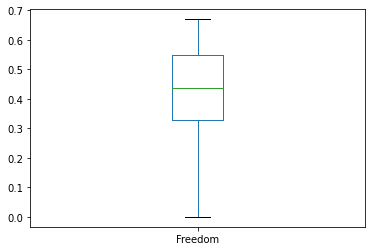

In [359]:
df1['Freedom'].plot.box()

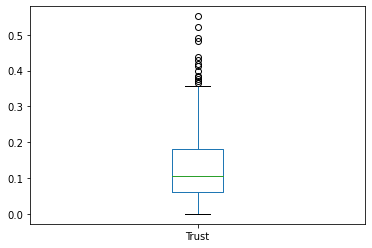

In [360]:
df1['Trust'].plot.box()

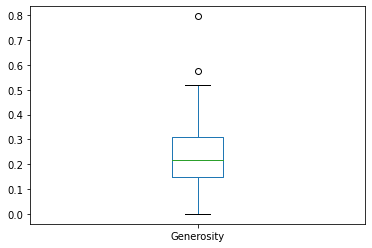

In [361]:
df1['Generosity'].plot.box()

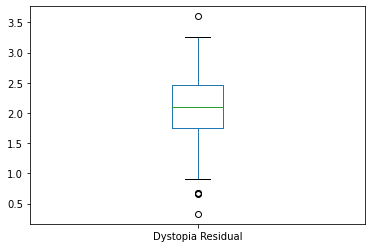

In [362]:
df1['Dystopia Residual'].plot.box()

In [363]:
df1.dtypes

Country               object
Region                object
HapR                   int64
HapS                 float64
StdE                 float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
dtype: object

In [364]:
df1.shape

(158, 12)

In [365]:
le=LabelEncoder()
df1['Country']=le.fit_transform(df1['Country'])
df1['Country']

0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Name: Country, Length: 158, dtype: int32

In [366]:
le=LabelEncoder()
df1['Region']=le.fit_transform(df1['Region'])
df1['Region']

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Name: Region, Length: 158, dtype: int32

In [367]:
cols_object_float=["Country"]
for col in cols_object_float:
    df1[col]=df1[col].astype(float)

In [368]:
cols_object_float=["Region"]
for col in cols_object_float:
    df1[col]=df1[col].astype(float)

In [369]:
cols_object_float=["HapR"]
for col in cols_object_float:
    df1[col]=df1[col].astype(float)

In [370]:
df1.dtypes

Country              float64
Region               float64
HapR                 float64
HapS                 float64
StdE                 float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
dtype: object

In [371]:
collist=df1.columns.values
ncol=12
nrows=10

In [372]:
plt.subplot?

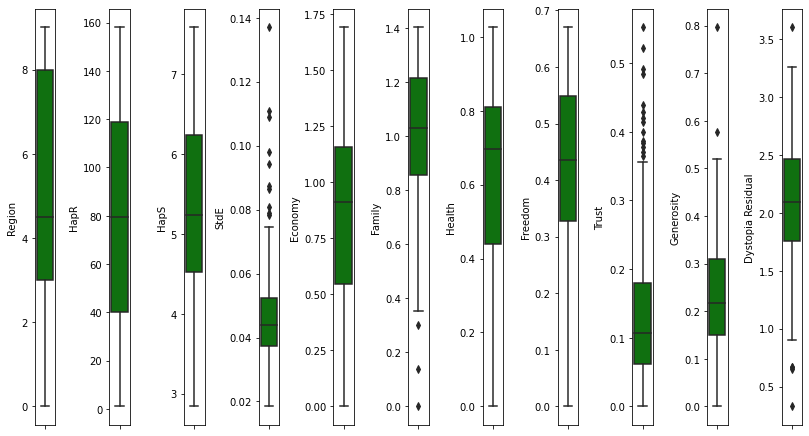

In [373]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [374]:
# To check distribution of skewness

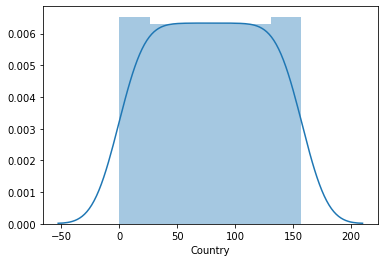

In [375]:
sns.distplot(df1['Country'])

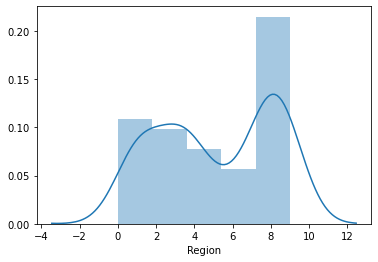

In [376]:
sns.distplot(df1['Region'])

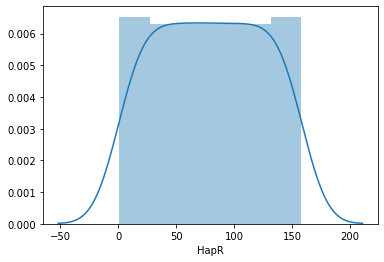

In [377]:
sns.distplot(df1['HapR'])

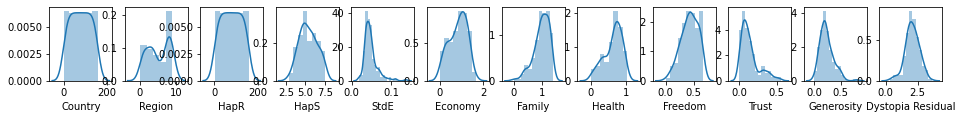

In [378]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df1[collist[i]])

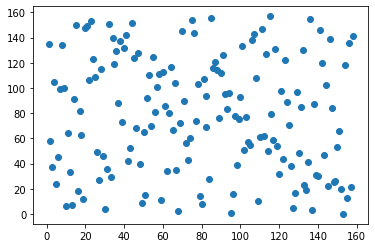

In [379]:
#bivariate analysis
plt.scatter(df1['HapR'],df1['Country'])

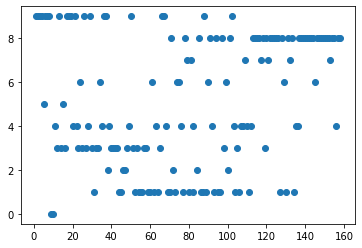

In [380]:
plt.scatter(df1['HapR'],df1['Region'])

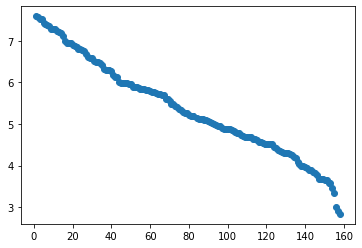

In [381]:
plt.scatter(df1['HapR'],df1['HapS'])

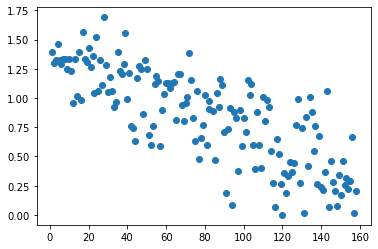

In [382]:
plt.scatter(df1['HapR'],df1['Economy'])

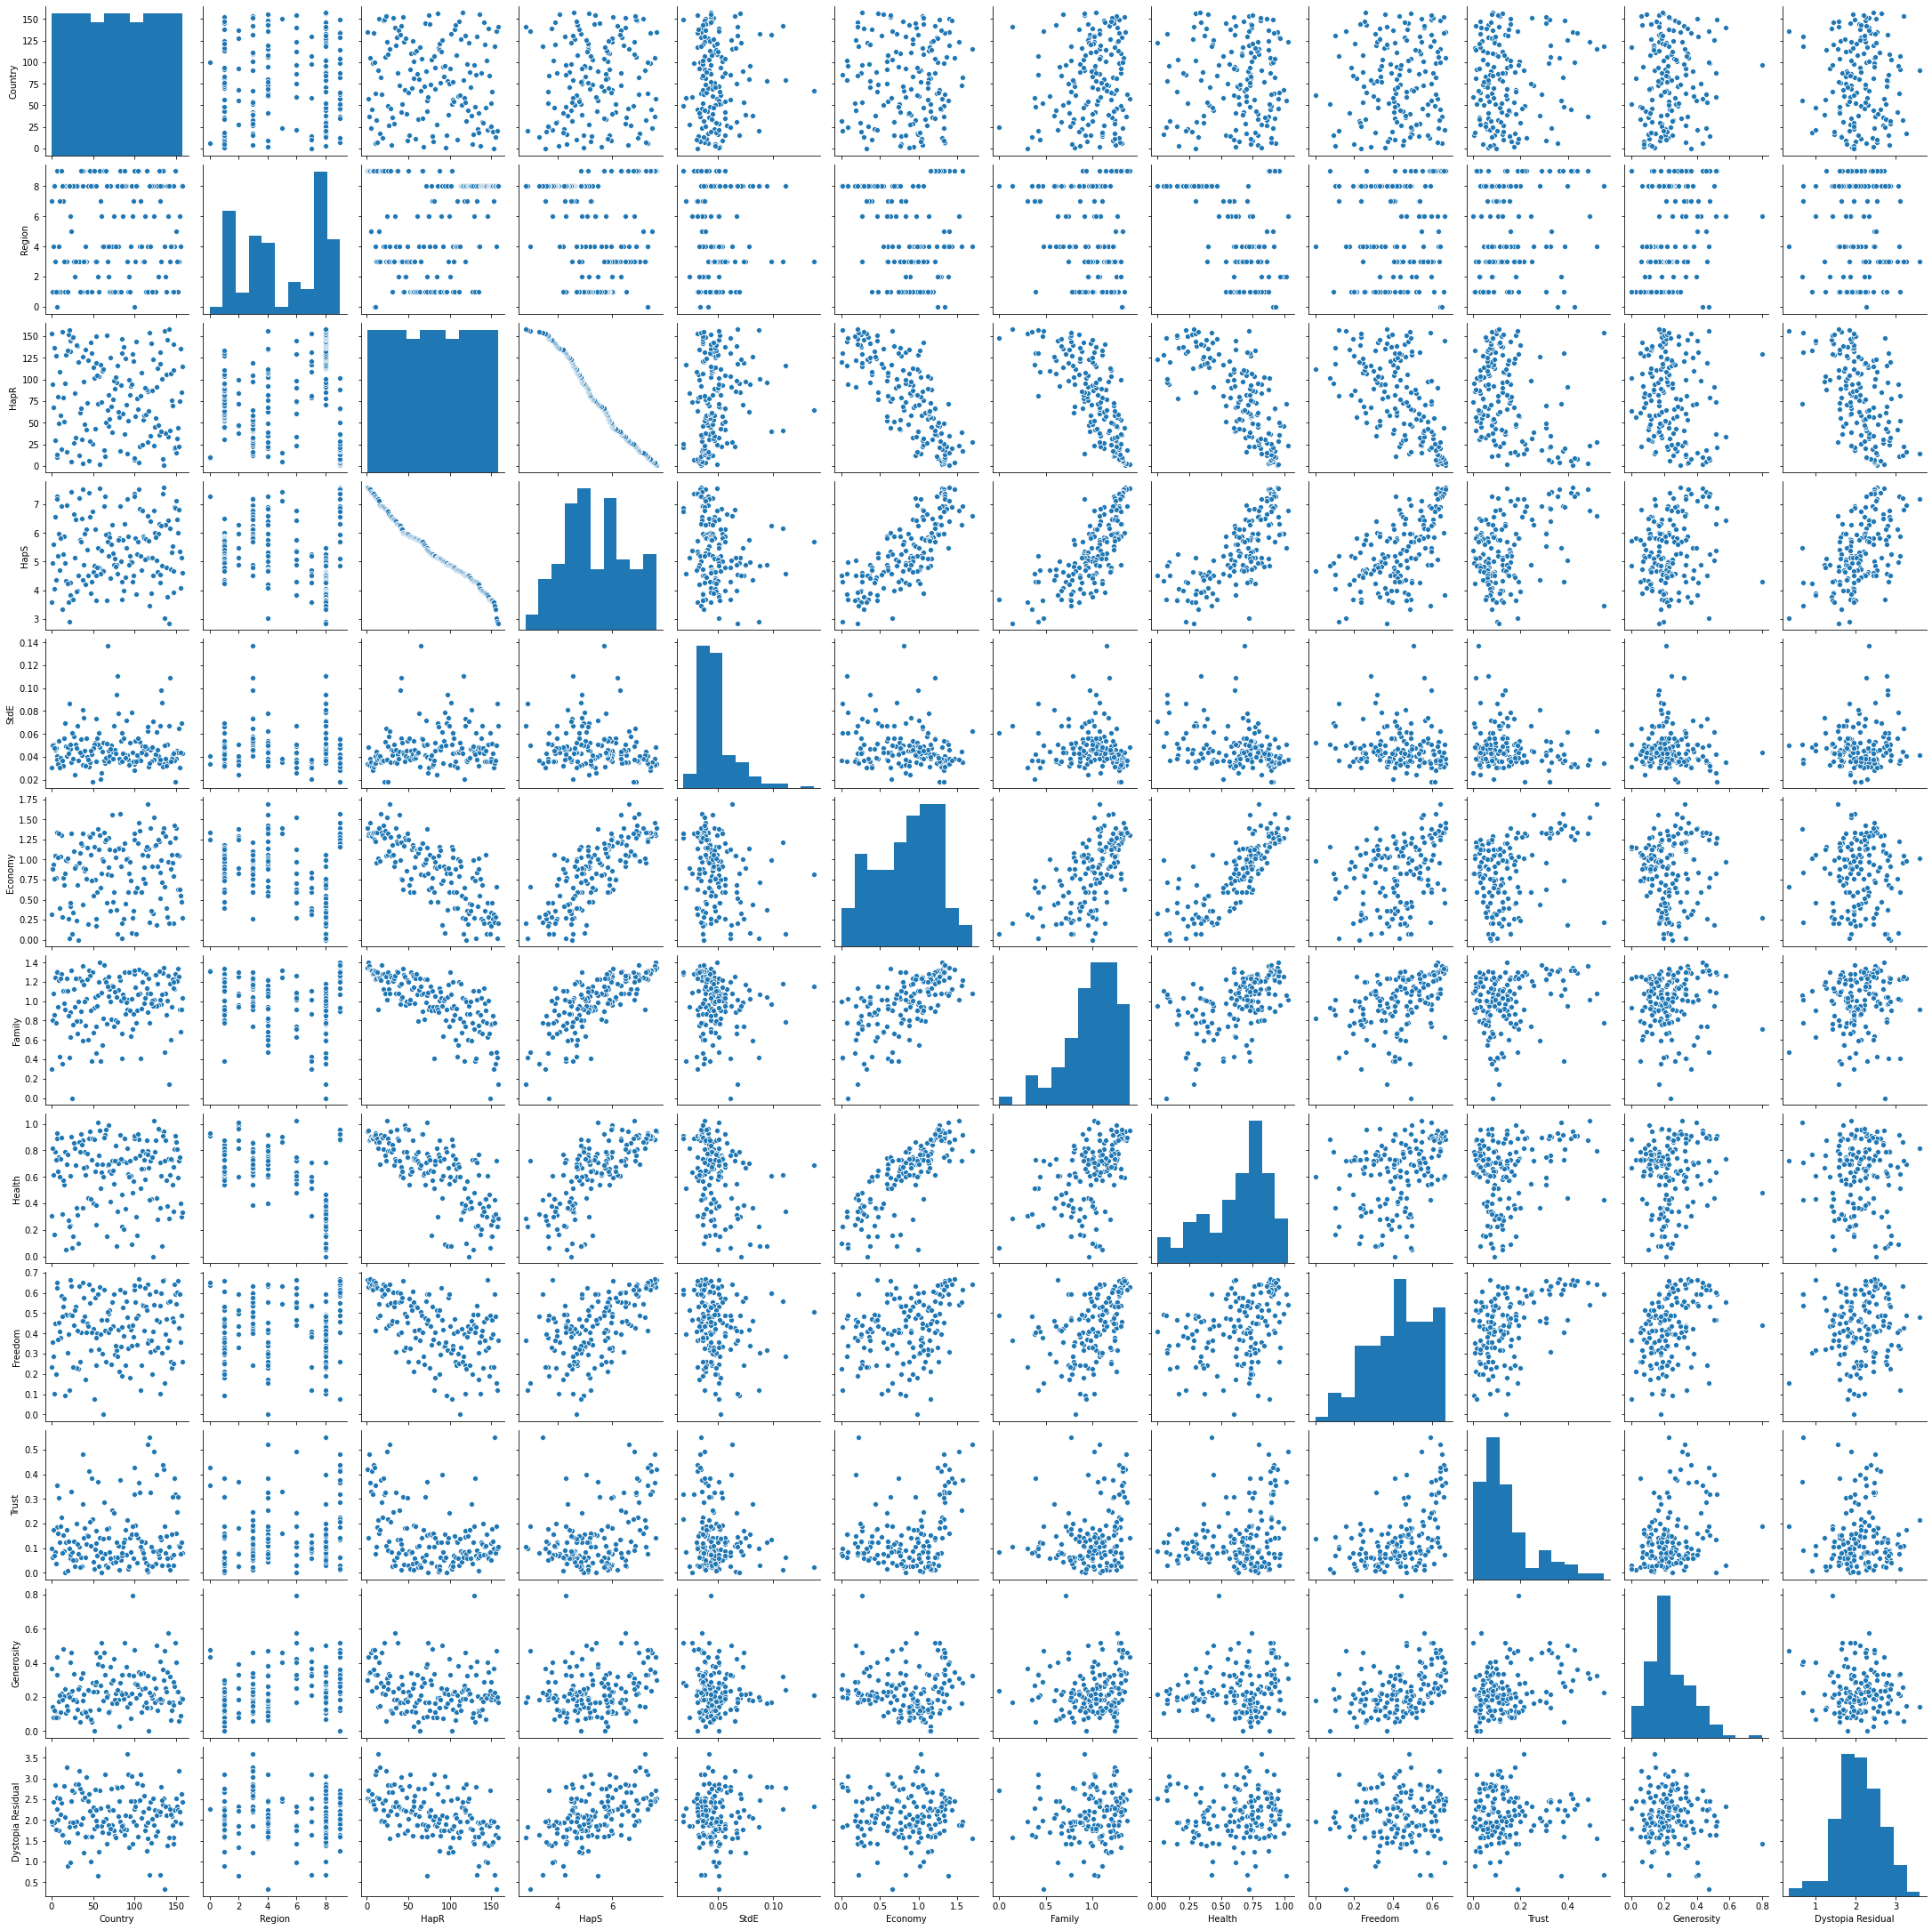

In [383]:
sns.pairplot(df1)

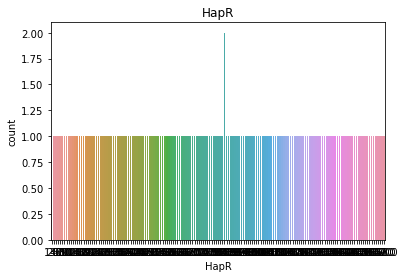

In [384]:
# Plotting the "Class" Column

import seaborn as sn
sn.countplot(df1["HapR"])
plt.title("HapR")
plt.show()

In [385]:
df.shape

(158, 12)

In [386]:
# Removing Outliers

In [387]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.23877001, 1.30025593, 1.72099989, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.69907456, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.67714922, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 1.67742676, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 1.69935209, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 1.72127743, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [388]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [389]:
#row and column

z[13][8]

0.35412581823244466

In [390]:
z[15][5]

0.33620783822579403

In [391]:
df1_new=df1[(z<3).all(axis=1)]

In [392]:
df1_new

,Country,Region,HapR,HapS,StdE,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,135.0,9.0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,151.0,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20.0,8.0,152.0,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153.0,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [393]:
df1.shape

(158, 12)

In [394]:
df1_new.shape

(149, 12)

In [395]:
#9 rows are related as an outliers

In [396]:
df1_new.describe()

,Country,Region,HapR,HapS,StdE,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,77.067114,5.080537,77.617450,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,45.833079,3.032519,44.854208,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,0.000000,0.000000,1.000000,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,38.000000,3.000000,39.000000,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,76.000000,4.000000,78.000000,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,116.000000,8.000000,115.000000,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,157.000000,9.000000,157.000000,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


In [397]:
df1_new.skew()

Country              0.048701
Region              -0.096985
HapR                 0.003268
HapS                 0.169740
StdE                 1.243048
Economy             -0.390657
Family              -0.811340
Health              -0.747711
Freedom             -0.400867
Trust                1.272530
Generosity           0.654710
Dystopia Residual   -0.021144
dtype: float64

In [398]:
# Trating skewness via log method

for col in df1_new.columns:
    if df1_new[col].skew()>0.55:
        df1_new[col]=np.log1p(df1_new[col])

In [399]:
df1_new.skew()

Country              0.048701
Region              -0.096985
HapR                 0.003268
HapS                 0.169740
StdE                 1.193808
Economy             -0.390657
Family              -0.811340
Health              -0.747711
Freedom             -0.400867
Trust                1.095190
Generosity           0.433539
Dystopia Residual   -0.021144
dtype: float64

In [400]:
# Regressor Model Building

In [401]:
df1_new

,Country,Region,HapR,HapS,StdE,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,135.0,9.0,1.0,7.587,0.033541,1.39651,1.34951,0.94143,0.66557,0.350502,0.259884,2.51738
1,58.0,9.0,2.0,7.561,0.047685,1.30232,1.40223,0.94784,0.62877,0.132299,0.362070,2.70201
2,37.0,9.0,3.0,7.527,0.032738,1.32548,1.36058,0.87464,0.64938,0.394451,0.293706,2.49204
3,105.0,9.0,4.0,7.522,0.038066,1.45900,1.33095,0.88521,0.66973,0.311176,0.297872,2.46531
4,24.0,5.0,5.0,7.427,0.034913,1.32629,1.32261,0.90563,0.63297,0.284856,0.377141,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,151.0,3.655,0.050132,0.46534,0.77115,0.15185,0.46866,0.164853,0.183696,1.41723
151,20.0,8.0,152.0,3.587,0.042331,0.25812,0.85188,0.27125,0.39493,0.120730,0.196775,1.46494
152,0.0,7.0,153.0,3.575,0.030374,0.31982,0.30285,0.30335,0.23414,0.092752,0.311228,1.95210
154,13.0,8.0,155.0,3.340,0.035908,0.28665,0.35386,0.31910,0.48450,0.077054,0.167715,1.63328


In [402]:
y=df1_new.iloc[:,2]
y

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
150    151.0
151    152.0
152    153.0
154    155.0
156    157.0
Name: HapR, Length: 149, dtype: float64

In [403]:
x =df1_new.iloc[:,[0,1,3,4,5,6,7,8,9,10,11]]
x

,Country,Region,HapS,StdE,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,135.0,9.0,7.587,0.033541,1.39651,1.34951,0.94143,0.66557,0.350502,0.259884,2.51738
1,58.0,9.0,7.561,0.047685,1.30232,1.40223,0.94784,0.62877,0.132299,0.362070,2.70201
2,37.0,9.0,7.527,0.032738,1.32548,1.36058,0.87464,0.64938,0.394451,0.293706,2.49204
3,105.0,9.0,7.522,0.038066,1.45900,1.33095,0.88521,0.66973,0.311176,0.297872,2.46531
4,24.0,5.0,7.427,0.034913,1.32629,1.32261,0.90563,0.63297,0.284856,0.377141,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,3.655,0.050132,0.46534,0.77115,0.15185,0.46866,0.164853,0.183696,1.41723
151,20.0,8.0,3.587,0.042331,0.25812,0.85188,0.27125,0.39493,0.120730,0.196775,1.46494
152,0.0,7.0,3.575,0.030374,0.31982,0.30285,0.30335,0.23414,0.092752,0.311228,1.95210
154,13.0,8.0,3.340,0.035908,0.28665,0.35386,0.31910,0.48450,0.077054,0.167715,1.63328


In [404]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

In [405]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.22,random_state=55)

In [406]:
print(x_train.shape, '\t',x_test.shape)

(116, 11) 	 (33, 11)


In [407]:
print(y_train.shape, '\t' ,y_test.shape)

(116,) 	 (33,)


In [408]:
# Importing our Model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [409]:
# using algrithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is :', m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score: ",r2_score(y_test,predm))
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is : 0.9907903546452995
Error:
Mean absolute error: 4.812426788328669
Mean squared error: 46.56822278174186
Root Mean Squared Error: 6.8240913520953
r2_score:  0.9767262965921958
*************************************************************************************************************


Score of DecisionTreeRegressor() is : 1.0
Error:
Mean absolute error: 2.5454545454545454
Mean squared error: 8.666666666666666
Root Mean Squared Error: 2.943920288775949
r2_score:  0.9956686036639263
*************************************************************************************************************


Score of KNeighborsRegressor() is : 0.9467372038501803
Error:
Mean absolute error: 10.690909090909093
Mean squared error: 173.04727272727274
Root Mean Squared Error: 13.154743354671453
r2_score:  0.9135150396470999
*************************************************************************************************************


Score of SVR() is : 0.3699759153854434
Err

In [410]:
# Cross Validate the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of',m, 'is :')
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is :
Score: [-0.09715243  0.61145576  0.81326245  0.46795191]
Mean Score: 0.44887942300628947
Standard deviation: 0.338275259270369
*************************************************************************************************************


Score of DecisionTreeRegressor() is :
Score: [-4.14349112 -0.36469678 -0.53050185 -3.91314374]
Mean Score: -2.237958373995053
Standard deviation: 1.7931688324624704
*************************************************************************************************************


Score of KNeighborsRegressor() is :
Score: [-10.73770483  -1.64779584  -3.99098067  -9.65545065]
Mean Score: -6.5079829956990025
Standard deviation: 3.799796684281925
*************************************************************************************************************


Score of SVR() is :
Score: [-41.58012189  -6.47239902  -6.5992641  -37.76258983]
Mean Score: -23.103593708202425
Standard deviation: 16.62270881588652
*********************

In [411]:
# Ridge model is giving best result so finding its best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [412]:
# Using Ridge model with best results

ridge = Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error :', mean_squared_error(y_test,predrd))
print('Root Mean Squared error:',mean_squared_error(y_test,predrd))
print("\n")
print("r2_score:",r2_score(y_test,predrd))

Score: 0.9905489399994322


Mean absolute error: 4.564287837390908
Mean squared error : 42.19871997972981
Root Mean Squared error: 42.19871997972981


r2_score: 0.9789100714107072


In [413]:
# cross Validate Ridge

score=cross_val_score(ridge,x,y,cv=4,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.0575028  0.61071044 0.81977192 0.42331937]
Mean Score: 0.47782613253751355
Standard deviation: 0.28028015100931664


# Using Ensemble Technique to Boostup our score

In [414]:
# Using Random Forest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error :', mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print("r2_score:",r2_score(y_test,predrf))

Score: 0.9996775968742824


Mean absolute error: 1.672727272727272
Mean squared error : 3.914242424242423
Root Mean Squared Error: 1.9784444455790067


r2_score: 0.9980437536198229


In [415]:
# Using Ada Boost

from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predadb))
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predadb)))
print('\n')
print("r2_score:",r2_score(y_test,predadb))

Score: 0.9886581059252418


Mean absolute error: 4.219436731461122
Mean squared error: 32.84140497445268
Root Mean Squared Error: 5.730742096312892


r2_score: 0.9835866375564009


In [416]:
# Cross Validate AdaBoost Regressor

score=cross_val_score(adb,x,y,cv=4,scoring='r2')
print("score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

score: [ 0.61059806  0.52608652  0.89366301 -0.00090017]
Mean Score: 0.5073618531896027
Standard deviation: 0.3234838467544236


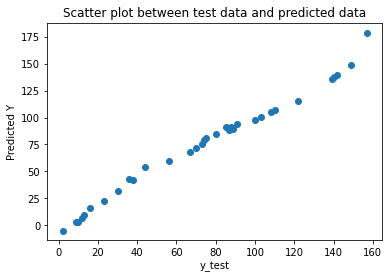

In [417]:
#plotting scatter plot between test data and predicted data for Ada Boost

plt.scatter(y_test,predadb)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("Scatter plot between test data and predicted data")
plt.show()

In [425]:
#Saving the AdaboostRegressor


In [433]:
df2=pd.DataFrame(predadb)
df2.to_csv('adb_predicton.csv')